In [147]:
import random

def fitness_ftn(coord):
  fitness_values=[]
  for i in range(len(coord)):
    # print(coord[i])
    fitness_values.append(random.randint(0,10))
  
  return fitness_values



function to plot coordinates on graph

In [146]:
import matplotlib.pyplot as plt
def plot_ftn(coord):
  #coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
  coord.append(coord[0]) # repeat the first point to create a 'closed loop'

  xs, ys = zip(*coord) # create lists of x and y values

  plt.figure()
  plt.plot(xs,ys) 
  plt.show() 

the fitness function

In [148]:
#CREATING A FITNESS FUNCTION

from shapely.geometry import LineString
import random

def new_fitness_ftn(coord):

  fitness_values=[]

  for i in range(len(coord)):
    fit_value=10
    for j in range(n):
      var1=int(coord[i][j][0],2)
      var2=int(coord[i][j][1],2)

      if j<n-2:

        var3=int(coord[i][j+1][0],2)
        var4=int(coord[i][j+1][1],2)

        var5=int(coord[i][j+2][0],2)
        var6=int(coord[i][j+2][1],2)
        
        line = LineString([(var1, var2), (var3, var4)])
        other = LineString([(var1, var2), (var5, var6)])
        
        x=line.intersects(other)
        
        if x==True:
          fit_value=fit_value-1
      fitness_values.append(fit_value)

  return fitness_values



  






function to generate the initial population

In [149]:
import random

#generating the random initial population
def generate_pop():


  
  all_coord=[]
  all_coord_decimal=[]




  for k in range(total_pop):

    coord=[]
    coord_dec=[]

    for i in range(n):
      x_axis=""
      y_axis=""
      l2=[]
      l2_dec=[]
      for j in range(8):
        x1=random.randint(0,1)
        y1=random.randint(0,1)
        
        x_axis+=f"{x1}"
        y_axis+=f"{y1}"
        
      l2.append(x_axis)
      l2.append(y_axis)
      l2_dec.append(int(x_axis,2))  
      l2_dec.append(int(y_axis,2))  


      coord.append(l2)
      coord_dec.append(l2_dec)

    all_coord.append(coord)
    all_coord_decimal.append(coord_dec)

  # print(all_coord)
  print("all population in decimal numbers is :")
  print(all_coord_decimal)

  # plot_ftn(all_coord_decimal[0])
  # plot_ftn(all_coord_decimal[1])
  return all_coord

function for crossover to make children

In [150]:
#implementing crossover
def crossover(all_coord):

  child_all_coord1=[]
  child_all_coord2=[]

  r=n/2
  j=total_pop-1
  l=0
  for k in range(int(total_pop/2)):
    child1=[]
    child2=[]
    for i in range(n):
      if i<r:
        child1.append(all_coord[l][i])
        child2.append(all_coord[j][i])

      elif i>=r:
        child1.append(all_coord[j][i])
        child2.append(all_coord[l][i])
    j-=1
    l+=1
    child_all_coord1.append(child1)
    child_all_coord2.append(child2)

  # print(child_all_coord1)
  # print(child_all_coord2)
  child_all_coord=child_all_coord1+child_all_coord2
  print("all newly created chidren are :")
  print(child_all_coord)

  total_all_coord=all_coord+child_all_coord
  # print(total_all_coord)
  new_total_pop=len(total_all_coord)
  return total_all_coord

function to randomly mutate some of the bits of some choromosomes

In [151]:
#applying mutation
def mutation(total_all_coord):

  new_list=[]
  new_total_pop=len(total_all_coord)
  # print(new_total_pop)

  for i in range(new_total_pop):
    
    ind1=random.randint(0,7)
    ind2=random.randint(0,n-1)
    ind3=random.randint(0,1)

    temp=list(total_all_coord[i][ind2][ind3])
    # print(temp)

    if temp[ind1]=='0':
      temp[ind1]='1'
    else:
      temp[ind1]='0'

    s="".join(temp)

    print(s)
    total_all_coord[i][ind2][ind3]=s
  return total_all_coord



randomly based on the probabilities trying to select the choromosomes that are fittest for the next generation

In [152]:
import numpy as np
#IMPLEMENTING ROULLETTE WHEEL
def roulette_wheel(total_all_coord):

#CALLING THE ABOVE FITNESS FUNCTION TO CALCULATE THE FITNESS VALUES OF THE COMPLETE POPULATION
  fitness_values=fitness_ftn(total_all_coord)
  # print(fitness_values)
  
  total_sum=0
  new_all_coord=[]

  ind_array=[]
  for i in range(len(total_all_coord)):
    ind_array.append(i)


  for i in fitness_values:
    total_sum+=i
  # print(total_sum)

  probabilities=[]
  for i in range(len(fitness_values)):
    probabilities.append(fitness_values[i]/total_sum)

  for i in range(int(len(total_all_coord)/2)):
    a=np.random.choice(ind_array,p=probabilities)

    new_all_coord.append(total_all_coord[a])
  return new_all_coord

the main function for calling all the functions step by steo

please enter the number of n i-e the number of points of polygon (between 3-15)6
all population in decimal numbers is :
[[[214, 92], [5, 8], [29, 217], [149, 114], [105, 176], [39, 100]], [[250, 132], [217, 137], [106, 168], [219, 159], [49, 175], [130, 26]], [[25, 113], [141, 176], [130, 142], [213, 150], [122, 19], [173, 182]], [[112, 150], [241, 20], [2, 70], [215, 216], [16, 217], [127, 117]]]
the initial random population is :
[[['11010110', '01011100'], ['00000101', '00001000'], ['00011101', '11011001'], ['10010101', '01110010'], ['01101001', '10110000'], ['00100111', '01100100']], [['11111010', '10000100'], ['11011001', '10001001'], ['01101010', '10101000'], ['11011011', '10011111'], ['00110001', '10101111'], ['10000010', '00011010']], [['00011001', '01110001'], ['10001101', '10110000'], ['10000010', '10001110'], ['11010101', '10010110'], ['01111010', '00010011'], ['10101101', '10110110']], [['01110000', '10010110'], ['11110001', '00010100'], ['00000010', '01000110'], ['11010111

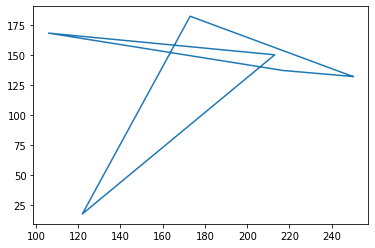

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['11111010', '10000100'], ['11011001', '10001001'], ['01101010', '10101000'], ['11010101', '10010110'], ['01111010', '00010010'], ['10101101', '10110110']], [['11010110', '01011100'], ['00000101', '00001000'], ['00011101', '11011001'], ['11010111', '11011000'], ['00010000', '11001001'], ['01101111', '01110101']], [['11111010', '10000100'], ['11011001', '10001001'], ['01101010', '10101000'], ['11010101', '10010110'], ['01111010', '00010010'], ['10101101', '10110110']], [['01110000', '10010110'], ['11110001', '00110100'], ['00000010', '01000110'], ['10010001', '01110010'], ['01101001', '10110000'], ['00100111', '01100100']]]
population after crossover
[[['11111010', '10000100'], ['11011001', '10001001'], ['01101010', '10101000'], ['11010101', '10010110'], ['01111010', '00010010'], ['10101101', '10110110']], [['11010110', '01011100'], ['00000101', '00001000'], ['00011101', '11011001

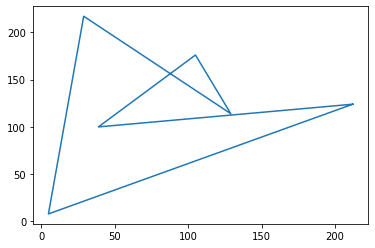

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['01110000', '10010110'], ['11110001', '00110100'], ['00000010', '01000110'], ['11010101', '10110110'], ['01111010', '00011010'], ['10111101', '10110110']], [['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '11011001'], ['10000001', '01110010'], ['01101001', '10110000'], ['00100111', '01100100']], [['11111010', '10000100'], ['11011001', '10011001'], ['01101010', '10101000'], ['11010111', '11011000'], ['00010000', '11001001'], ['01111111', '01110101']], [['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '11011001'], ['10000001', '01110010'], ['01101001', '10110000'], ['00100111', '01100100']]]
population after crossover
[[['01110000', '10010110'], ['11110001', '00110100'], ['00000010', '01000110'], ['11010111', '11011000'], ['00010000', '11001001'], ['01111111', '01110101']], [['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '11011001

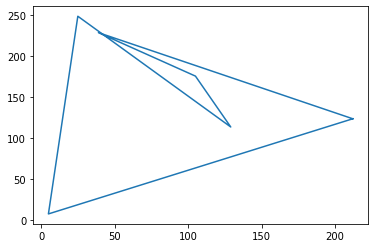

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['11010100', '01111100'], ['00000101', '00001000'], ['00011001', '11111001'], ['10000001', '01110010'], ['01101001', '10110000'], ['00100111', '11100101']], [['11010100', '01111100'], ['00000101', '00001000'], ['00011001', '11111001'], ['11010101', '10110110'], ['01111010', '00011010'], ['10111101', '10110110']], [['11010100', '01111100'], ['00000101', '00001000'], ['00011001', '11111001'], ['10000001', '01110010'], ['01101001', '10110000'], ['00100111', '11100101']], [['01110001', '11010110'], ['11110001', '00110100'], ['00000010', '01000110'], ['10000001', '01110010'], ['01101001', '10110000'], ['00100111', '11100101']]]
population after crossover
[[['11010100', '01111100'], ['00000101', '00001000'], ['00011001', '11111001'], ['10000001', '01110010'], ['01101001', '10110000'], ['00100111', '11100101']], [['11010100', '01111100'], ['00000101', '00001000'], ['00011001', '11111001

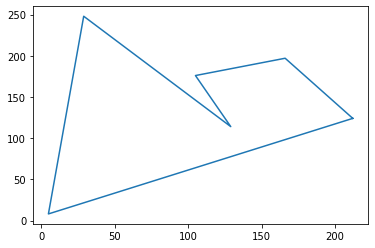

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '11111000'], ['10000001', '01110010'], ['01101001', '10110000'], ['10100110', '11000101']], [['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '11111000'], ['11010101', '10110110'], ['01111010', '00011010'], ['10111111', '10100110']], [['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '11111000'], ['10000001', '01110010'], ['01101001', '10110000'], ['10100110', '11000101']], [['01110001', '11010110'], ['11110000', '00110100'], ['00000010', '01000110'], ['10000001', '01110010'], ['01101001', '10110000'], ['10100110', '11000101']]]
population after crossover
[[['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '11111000'], ['10000001', '01110010'], ['01101001', '10110000'], ['10100110', '11000101']], [['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '11111000

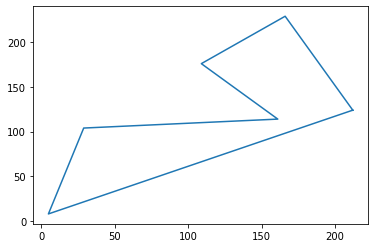

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '01101000'], ['10100001', '01110010'], ['01101101', '10110000'], ['10100110', '11100101']], [['01110001', '11010110'], ['11110000', '00110101'], ['00010010', '01000110'], ['11010101', '11110110'], ['01111010', '00011010'], ['10111111', '10100110']], [['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '01101000'], ['10100001', '01110010'], ['01101101', '10110000'], ['10100110', '11100101']], [['01110001', '11010110'], ['11110000', '00110101'], ['00010010', '01000110'], ['10100001', '01110010'], ['01101101', '10110000'], ['10100110', '11100101']]]
population after crossover
[[['11010100', '01111100'], ['00000101', '00001000'], ['00011101', '01101000'], ['10100001', '01110010'], ['01101101', '10110000'], ['10100110', '11100101']], [['01110001', '11010110'], ['11110000', '00110101'], ['00010010', '01000110

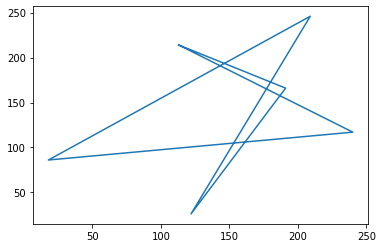

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['01110001', '11010110'], ['11110000', '01110101'], ['00010010', '01010110'], ['10100001', '01110010'], ['01101101', '10110000'], ['11100110', '11100101']], [['10010100', '01111100'], ['10000101', '00011000'], ['00001101', '01101000'], ['10100001', '01110010'], ['01101101', '10110000'], ['11100110', '11100101']], [['10010100', '01111100'], ['10000101', '00011000'], ['00001101', '01101000'], ['11010001', '11110110'], ['01111010', '00011010'], ['10111111', '10100110']], [['10010100', '01111100'], ['10000101', '00011000'], ['00001101', '01101000'], ['10100001', '01110010'], ['01101101', '10110000'], ['11100110', '11100101']]]
population after crossover
[[['01110001', '11010110'], ['11110000', '01110101'], ['00010010', '01010110'], ['11010001', '11110110'], ['01111010', '00011010'], ['10111111', '10100110']], [['10010100', '01111100'], ['10000101', '00011000'], ['00001101', '01101000

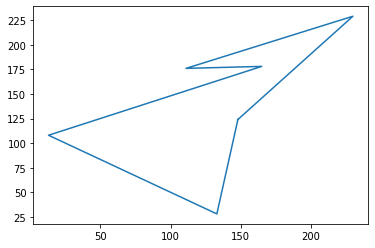

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['10010100', '01111100'], ['10000101', '00011100'], ['00001101', '01101100'], ['10100101', '10110010'], ['01101111', '10110000'], ['11100110', '11100101']], [['10010100', '01111100'], ['10000101', '00011100'], ['00001101', '01101100'], ['10100101', '10110010'], ['01101111', '10110000'], ['11100110', '11100101']], [['10010100', '01111100'], ['10000101', '00011100'], ['00001101', '01101100'], ['10100101', '10110010'], ['01101111', '10110000'], ['11100110', '11100101']], [['10010100', '01111100'], ['10000101', '00011100'], ['00001101', '01101100'], ['10100101', '10110010'], ['01101111', '10110000'], ['11100110', '11100101']]]
population after crossover
[[['10010100', '01111100'], ['10000101', '00011100'], ['00001101', '01101100'], ['10100101', '10110010'], ['01101111', '10110000'], ['11100110', '11100101']], [['10010100', '01111100'], ['10000101', '00011100'], ['00001101', '01101100

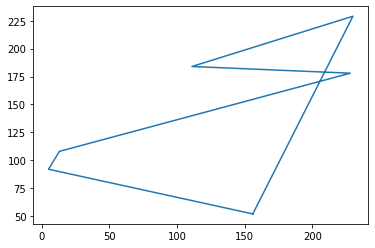

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['10011100', '00110100'], ['00000101', '01011100'], ['00001101', '01101100'], ['11100100', '10110010'], ['01101111', '10111000'], ['11100110', '11100101']], [['10011100', '00110100'], ['00000101', '01011100'], ['00001101', '01101100'], ['11100100', '10110010'], ['01101111', '10111000'], ['11100110', '11100101']], [['10011100', '00110100'], ['00000101', '01011100'], ['00001101', '01101100'], ['11100100', '10110010'], ['01101111', '10111000'], ['11100110', '11100101']], [['10011100', '00110100'], ['00000101', '01011100'], ['00001101', '01101100'], ['11100100', '10110010'], ['01101111', '10111000'], ['11100110', '11100101']]]
population after crossover
[[['10011100', '00110100'], ['00000101', '01011100'], ['00001101', '01101100'], ['11100100', '10110010'], ['01101111', '10111000'], ['11100110', '11100101']], [['10011100', '00110100'], ['00000101', '01011100'], ['00001101', '01101100

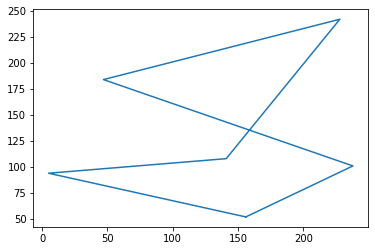

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['10011100', '00110100'], ['00000101', '01011110'], ['10001101', '01101100'], ['11100100', '11110010'], ['00101111', '10111000'], ['11101110', '01100101']], [['10011100', '00110100'], ['00000101', '01011110'], ['10001101', '01101100'], ['11100100', '11110010'], ['00101111', '10111000'], ['11101110', '01100101']], [['10011100', '00110100'], ['00000101', '01011110'], ['10001101', '01101100'], ['11100100', '11110010'], ['00101111', '10111000'], ['11101110', '01100101']], [['10011100', '00110100'], ['00000101', '01011110'], ['10001101', '01101100'], ['11100100', '11110010'], ['00101111', '10111000'], ['11101110', '01100101']]]
population after crossover
[[['10011100', '00110100'], ['00000101', '01011110'], ['10001101', '01101100'], ['11100100', '11110010'], ['00101111', '10111000'], ['11101110', '01100101']], [['10011100', '00110100'], ['00000101', '01011110'], ['10001101', '01101100

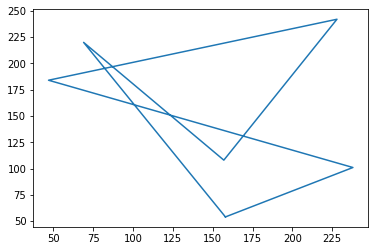

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['10011110', '00110110'], ['01000101', '11011100'], ['10011101', '01101100'], ['11100100', '11110010'], ['00101111', '10111000'], ['11101110', '01100101']], [['10011110', '00110110'], ['01000101', '11011100'], ['10011101', '01101100'], ['11100100', '11110010'], ['00101111', '10111000'], ['11101110', '01100101']], [['10011110', '00110110'], ['01000101', '11011100'], ['10011101', '01101100'], ['11100100', '11110010'], ['00101111', '10111000'], ['11101110', '01100101']], [['10011110', '00110110'], ['01000101', '11011100'], ['10011101', '01101100'], ['11100100', '11110010'], ['00101111', '10111000'], ['11101110', '01100101']]]
population after crossover
[[['10011110', '00110110'], ['01000101', '11011100'], ['10011101', '01101100'], ['11100100', '11110010'], ['00101111', '10111000'], ['11101110', '01100101']], [['10011110', '00110110'], ['01000101', '11011100'], ['10011101', '01101100

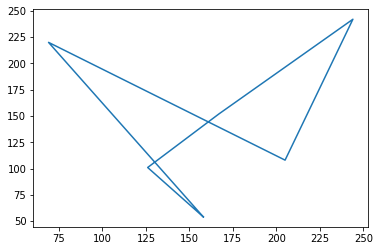

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['10011110', '00110110'], ['01000101', '11011100'], ['11001101', '01101100'], ['11110100', '11110010'], ['10100111', '10011000'], ['01111110', '01100101']], [['10011110', '00110110'], ['01000101', '11011100'], ['11001101', '01101100'], ['11110100', '11110010'], ['10100111', '10011000'], ['01111110', '01100101']], [['10011110', '00110110'], ['01000101', '11011100'], ['11001101', '01101100'], ['11110100', '11110010'], ['10100111', '10011000'], ['01111110', '01100101']], [['10011110', '00110110'], ['01000101', '11011100'], ['11001101', '01101100'], ['11110100', '11110010'], ['10100111', '10011000'], ['01111110', '01100101']]]
population after crossover
[[['10011110', '00110110'], ['01000101', '11011100'], ['11001101', '01101100'], ['11110100', '11110010'], ['10100111', '10011000'], ['01111110', '01100101']], [['10011110', '00110110'], ['01000101', '11011100'], ['11001101', '01101100

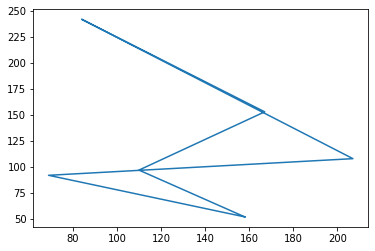

press 1 if you want to continus the iterarions, else press any other key1
all newly created chidren are :
[[['10011110', '00110100'], ['01000101', '01011100'], ['11001111', '01101100'], ['01010100', '11110010'], ['10100111', '10011001'], ['01101110', '01100001']], [['10011110', '00110100'], ['01000101', '01011100'], ['11001111', '01101100'], ['01010100', '11110010'], ['10100111', '10011001'], ['01101110', '01100001']], [['10011110', '00110100'], ['01000101', '01011100'], ['11001111', '01101100'], ['01010100', '11110010'], ['10100111', '10011001'], ['01101110', '01100001']], [['10011110', '00110100'], ['01000101', '01011100'], ['11001111', '01101100'], ['01010100', '11110010'], ['10100111', '10011001'], ['01101110', '01100001']]]
population after crossover
[[['10011110', '00110100'], ['01000101', '01011100'], ['11001111', '01101100'], ['01010100', '11110010'], ['10100111', '10011001'], ['01101110', '01100001']], [['10011110', '00110100'], ['01000101', '01011100'], ['11001111', '01101100

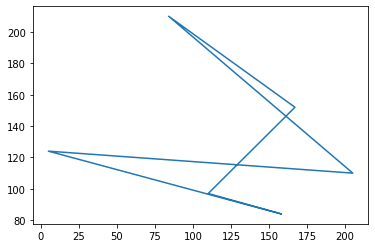

press 1 if you want to continus the iterarions, else press any other key2
the program is terminated !!


In [153]:
#IMPLEMENTING THE GENETIC ALGORITHM STEP BY STEP BY CALLING ABOVE FUNCTIONS
total_pop=4

#GENERATE THE INITIAL POPULATION
n=int(input("please enter the number of n i-e the number of points of polygon (between 3-15)"))

all_coord=generate_pop()
print("the initial random population is :")
print(all_coord)
print("\n")

new_all_coord=all_coord



while True:

  all_coord=new_all_coord

  #CALLING THE ABOVE CROSSOVER FUNCTION
  total_all_coord=crossover(all_coord)
  print("population after crossover")
  print(total_all_coord)
  print("\n")

  #CALLING THE ABOVE MUTATION FUNCTION
  total_all_coord=mutation(total_all_coord)
  print("population after mutation:")
  print(total_all_coord)
  print("\n")

  #CALLING THE ROULETTE WHEEL TO SELECT ONLY HALF OF THE POPULATION FOR THE NEXT ITERATION
  new_all_coord=roulette_wheel(total_all_coord)
  print("after applying the roulette wheel and selecting the half population, the selected population is :")
  print(new_all_coord)
  print("\n")

  l=fitness_ftn(new_all_coord)
  print("most fittest chomosome so far received is :")
  m=l.index(max(l))
  print(new_all_coord[m])

  d2=[]
  for j in range(n):
    d1=[]
    d1.append(int(new_all_coord[m][j][0],2))
    d1.append(int(new_all_coord[m][j][1],2))
    
    d2.append(d1)


  print("most fittest choromosome is : ",d2)
  
  plot_ftn(d2)
  c=int(input("press 1 if you want to continus the iterarions, else press any other key"))

  if c!=1:
    break

print("the program is terminated !!")






the program can keep on going until the user is satisfied with the obtained solution